In [1]:
import nibabel as nib
import numpy as np
from nilearn.plotting import plot_anat
import os

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
img = nib.load('aparc+aseg.mgz')

In [3]:
data1 = img.get_data()
aff = img.affine
data_shape = data1.shape

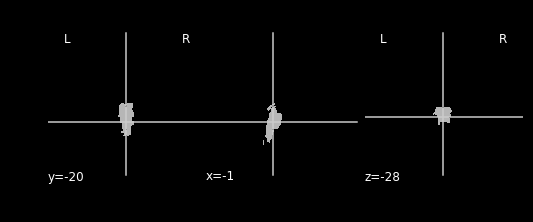

In [4]:
%matplotlib inline

def plot_data(data, name):
    fname = '{}.nii'.format(name)
    out_data = nib.Nifti1Image((data == 16).astype(int), affine=aff)
    nib.save(out_data, fname)
    plot_anat('test.nii')

plot_data(data1, 'test')

In [5]:
bs = np.where(data1 == 16)

In [6]:
bs

(array([112, 112, 113, ..., 147, 147, 147]),
 array([136, 137, 136, ..., 157, 157, 157]),
 array([111, 111, 110, ..., 110, 111, 112]))

In [7]:
x_coord, y_coord, z_coord = bs[0], bs[1], bs[2]

In [8]:
x_min,x_max  = min(x_coord), max(x_coord)
print(x_min, x_max)

112 147


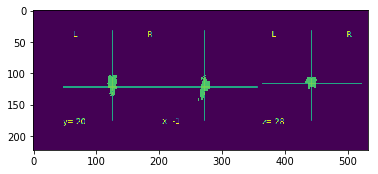

In [19]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('index.png', 0)
plt.imshow(img)

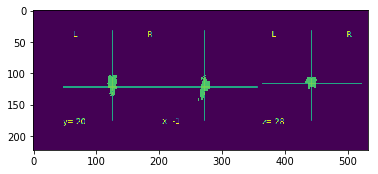

In [20]:
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(img)
plt.imshow(gray)

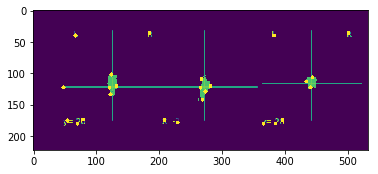

(<matplotlib.image.AxesImage at 0x7fa975527358>, None)

In [17]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()